# **ARIMA Model**

To Successfully apply <tt>ARIMA Model</tt> to the timeseries, the timeseries should be stationary. A Stationary timeseries haa the following properties.

1. The Mean of the series should not be a function of time.
2. the Variance of the series should not be a function of time.
3. the co-Variance of the series shopuld also not the be the function of time.

A test, <i>Augmented Dickey-fuller</i> test can be performed on the series to check for the stationarity. 

Once we've established that the timeseries is non-stationary. We can start by making it stationary. This can be done through <tt>differencing.</tt> The idea behind differencing is the shift the series by 1 and take the difference with the original series. We can continue with this process untill we get some series which is stationary.  An ARIMA model consistes of three terms <tt>AR (Autoregression)</tt>, <tt>I (Integrated)</tt> and <tt>MA (Moving Average)</tt>. We represent these terms with the coefficients <tt>P,D & Q</tt>.

1. <u>**P = ORDER OF AR :**</u> p = 3 means that the Sales of Dec, Sales<sub>Dec</sub> depends on past 3 period i.e. Sales<sub>Nov</sub> , Sales<sub>Oct</sub> & Sales<sub>Sep</sub><br/>
the Sales of Nov, Sales<sub>Nov</sub> depends on past 3 period i.e. Sales<sub>Oct</sub> , Sales<sub>Sep</sub> & Sales<sub>Aug</sub><br/>

    P values can be found using PACF plots.

2. <u>**Moving Average :**</u> The y<sub>t</sub> has the effects of the previous error terms in it.

    y<sub>t</sub> = a + E<sub>t</sub> + b<sub>1</sub>E<sub>t-1</sub> + b<sub>2</sub>E<sub>t-2</sub>

    **Q = ORDER OF MA**

    Q values can be found using ACF plots.

3. <u>**Integrated ~~ Differenced :**</u> We take the difference of the value with it's previous values.

    DIFF<SUB>t</SUB> = Y<sub>t</sub> - Y<sub>t-1<sub> 

    **D = ORDER OF Difference** : This removes the effect of <u>**trends**</u> and <u>**seasonality**</u> form the series. The value D describes how many times we take the difference of the series.

## **AR Model (AutoRegressive Model)**

We're going to start with a simplified model having <tt>D and Q</tt> as 0. this will give us the pure <tt>Autoregressive model</tt>. 

The <tt>Autoregression</tt> tells us how a value of the timeseries at time <tt>t</tt> is linearly related to its past values.

### $y_t = c + \phi_1y_{t-1} + \phi_2y_{t-2} + ... + \phi_py_{t-p} +  \epsilon_t$

here,

### $ c $ : Is the constant
### $ \phi_1,\phi_2 $ : Are the lag coefficient upto order <i>p</i>
### $ \epsilon_t $ : Is the white noise

The number of the time lag for the dependency would be the orders of the AR model. For eg. <tt>AR(1)</tt> model would be :

### $y_t = c + \phi_1y_{t-1} +  \epsilon_t$

<tt>AR(2)</tt> model would be :

### $y_t = c + \phi_1y_{t-1} + \phi_2y_{t-2} +  \epsilon_t$

The more the order we use, more accurate prediction would be, but there is a limit after which the result may deteriorate as we might be picking up more noise than the informations.

In [1]:
import pandas as pd
import numpy as np


In [2]:
from statsmodels.tsa.ar_model import AR, ARResults

**Loading the dataset**

In [3]:
df = pd.read_csv(r'C:\Users\nevishwakarma\Documents\Datasets\Data_Udemy\uspopulation.csv', index_col=['DATE'], parse_dates=True)
df.index.freq = 'MS'
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


<AxesSubplot:xlabel='DATE'>

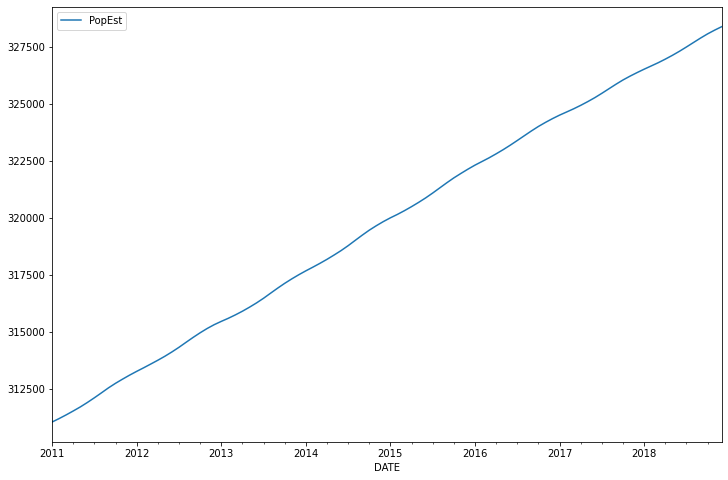

In [4]:
df.plot(figsize=(12,8))

**Train Test Split**

In [5]:
len(df)

96

In [6]:
train = df.iloc[:84]
test = df.iloc[84:]

## **Fitting the model**

Starting with Order 1

In [12]:
model = AR(train['PopEst'])
ar1_fit = model.fit(maxlag=1); # Order 1

In [16]:
test.tail()

,PopEst
DATE,
2018-08-01,327698
2018-09-01,327893
2018-10-01,328077
2018-11-01,328241
2018-12-01,328393


In [14]:
test.head()

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134


Making test set prediction

To do this we use the predict method. The model already know that the frequency of the dataset is 'MS', which is the Month Start. The predict methods asks the starting point and the end point. Which means that it'll start with the date in the 'start position' of the training set and predict for the next months till the end position.

For eg. Here the starting date of test set is <tt>2018-01-01</tt> and the end date is <tt>2018-12-01</tt>. So we need to predict the data from <tt>2018-01-01</tt> to <tt>2018-12-01</tt>. The start date of the test set is 84 points after the train set (as the length of the training set is 84). so the value of start position would be 84. the value of the end position would be the length of the full dataset.

In [19]:
start = 84
end = len(df) - 1

print("Start at {0}. End at {1}".format(start,end))

Start at 84. End at 95


In [21]:
predictions1 = ar1_fit.predict(start=start, end=end)
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

If you see, the dates of the prediction is same as that of the test set.

In [25]:
predictions1 = predictions1.rename('AR(1) Predictions')

<AxesSubplot:xlabel='DATE'>

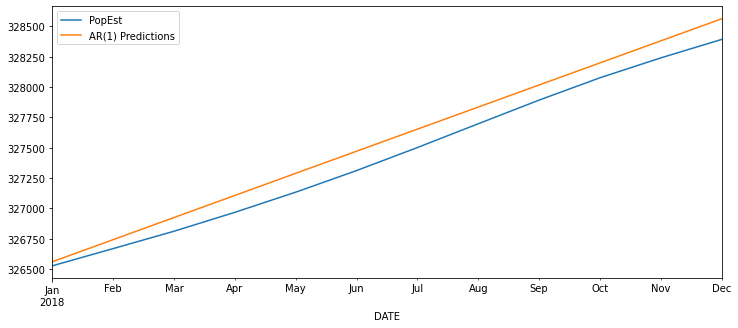

In [27]:
test.plot(figsize=(12,4), legend=True)
predictions1.plot(figsize=(12,5), legend=True)

AR Model Order 2

In [29]:
model = AR(train['PopEst'])
ar2_fit = model.fit(maxlag=2); # Order 1

C:\Users\nevishwakarma\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR

In [33]:
predictions2 = ar2_fit.predict(start=start, end=end)
predictions2 = predictions2.rename('AR(2) Predictions')
predictions2

2018-01-01    326535.672503
2018-02-01    326694.718510
2018-03-01    326854.882250
2018-04-01    327015.944948
2018-05-01    327177.719499
2018-06-01    327340.045896
2018-07-01    327502.787330
2018-08-01    327665.826846
2018-09-01    327829.064479
2018-10-01    327992.414808
2018-11-01    328155.804858
2018-12-01    328319.172306
Freq: MS, Name: AR(2) Predictions, dtype: float64

<AxesSubplot:xlabel='DATE'>

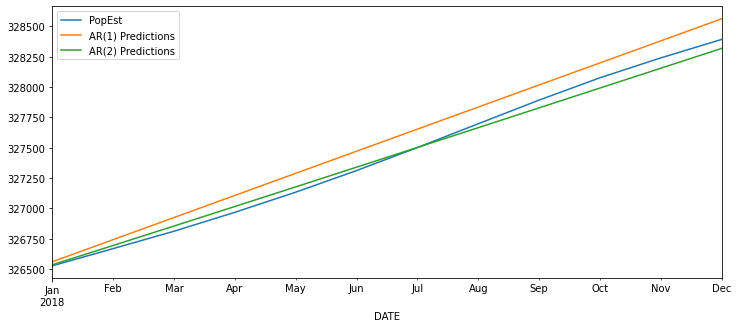

In [34]:
test.plot(figsize=(12,4), legend=True)
predictions1.plot(figsize=(12,5), legend=True)
predictions2.plot(figsize=(12,5), legend=True)

This model is better than previous one, but we can't keep on doing this, let the Statsmodel chjoose it for us.

In [38]:
model = AR(train['PopEst'])
ARfit = model.fit(ic='t-stat')
ARfit.params

C:\Users\nevishwakarma\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [45]:
predictions8 = ARfit.predict(start=start, end=end)
predictions8 = predictions8.rename('AR(8) Predictions')

**Models Evaluation**

This is the model fitted with best P value. The model chose P=8 is the best suited value. Let's chech the RMSE score for model evaluation

In [37]:
from sklearn.metrics import mean_squared_error

In [41]:
labels = ['AR1', 'AR2', 'AR8']
preds = [predictions1, predictions2, predictions8]

In [43]:
for i in range(3):
    error = np.sqrt(mean_squared_error(test['PopEst'], preds[i]))
    print("{0} error was : {1}".format(labels[i],error))

AR1 error was : 132.09736649865175
AR2 error was : 52.08894957479485
AR8 error was : 13.674003699711271


So the model with p = 8 has the lease <tt>RMSE</tt> so it's the best model of them all. That means the model looked back 8 months to predict the population for the 9<sup>th</sup> month. Let's now plot this model's predictions.

<AxesSubplot:xlabel='DATE'>

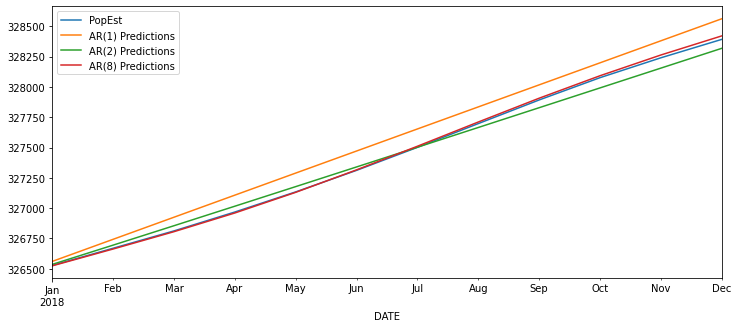

In [46]:
test.plot(figsize=(12,4), legend=True)
predictions1.plot(figsize=(12,5), legend=True)
predictions2.plot(figsize=(12,5), legend=True)
predictions8.plot(figsize=(12,5), legend=True)

**Forecasting**

Let's predict the US population for the year 2021.

<u>**NOTE: Test set length should match with the forcasting set length.**</u>

In [47]:
# Retraining the model on entire dataset

model = AR(df['PopEst'])
ARfit = model.fit()

start = len(df)
end = len(df) + 12 # A year later

forcasted_values = ARfit.predict(start=start, end=end).rename('Forecast')

C:\Users\nevishwakarma\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR

<AxesSubplot:xlabel='DATE'>

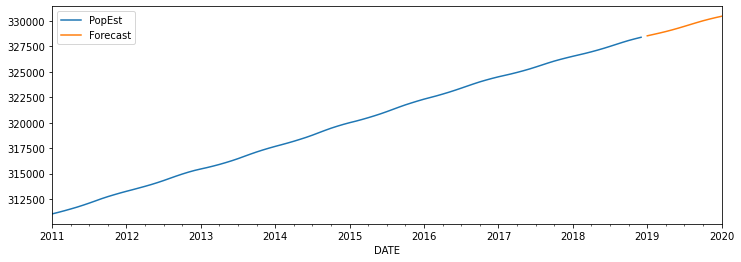

In [48]:
df.plot(figsize=(12,4), legend=True)
forcasted_values.plot(figsize=(12,4), legend=True)

**The reason why there is a break between the actual value and the predicted value is becase these are two different series. Pandas automatically make this break. If we want to remove this break, we would need to combine the two series in single dataframe.**